In [1]:
#Import Libraries
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Filter out warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Create a file path
Net_generation = Path("Resources/Net_generation_United_States_all_sectors_annual.csv")

#Read in the data
Net = pd.read_csv(Net_generation)
Net.head()

,Year,wind thousand megawatthours,coal thousand megawatthours,petroleum liquids thousand megawatthours,petroleum coke thousand megawatthours,natural gas thousand megawatthours,other gases thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,all utility-scale solar thousand megawatthours,geothermal thousand megawatthours,wood and wood-derived fuels thousand megawatthours,other biomass thousand megawatthours,hydro-electric pumped storage thousand megawatthours,other thousand megawatthours,small-scale solar photovoltaic thousand megawatthours
0,2023,425235.4024,675263.6246,11593.62650,4878.03130,1802062.498,11450.81255,775347.1510,239854.6187,164501.57470,16461.76454,31438.92214,16024.91956,-5896.536,9954.76608,73618.88030
1,2022,434297.3582,831511.6121,15805.38430,7125.85731,1687066.716,11722.29001,771537.1765,254788.6671,143796.90430,16086.92900,35463.56744,16383.40823,-6027.858,11114.22024,61282.24775
2,2021,378196.7748,897998.7599,11662.56214,7510.64790,1579189.987,11397.23724,779644.5950,251584.8424,115258.24830,15975.12700,36462.67263,17789.55298,-5111.684,12140.06612,49164.20156
3,2020,337938.0490,773392.8971,9661.69285,7679.32228,1626789.640,11818.47797,789878.8630,285273.8948,89198.71512,15889.69700,36218.94295,18492.67346,-5321.205,12855.18509,41522.37953
4,2019,295882.4835,964956.8115,11522.05169,6818.69098,1588532.839,12591.09423,809409.2620,287873.7305,71936.82224,15472.71700,38543.38211,18963.57113,-5260.744,13331.16707,34957.44723


In [3]:
#Rename Columns for cleaner data
Net = Net.rename(columns = {'wind thousand megawatthours': 'Wind',
                            'coal thousand megawatthours': 'Coal',
                            'petroleum liquids thousand megawatthours': 'Petroleum Liquids',
                            'petroleum coke thousand megawatthours': 'Petroleum Coke',
                            'natural gas thousand megawatthours': 'Natural Gas',
                            'other gases thousand megawatthours': 'Other Gases',
                            'nuclear thousand megawatthours': 'Nuclear',
                            'conventional hydroelectric thousand megawatthours': 'Conventional Hydroelectric',
                            'all utility-scale solar thousand megawatthours': 'Utility Scale Solar',
                            'geothermal thousand megawatthours': 'Geothermal',
                            'wood and wood-derived fuels thousand megawatthours': 'Wood/Wood Derived',
                            'other biomass thousand megawatthours': 'Other Biomass',
                            'hydro-electric pumped storage thousand megawatthours': 'Pumped Storage Hydroelectric',
                            'other thousand megawatthours': 'Other',
                            'small-scale solar photovoltaic thousand megawatthours': 'Small Scale Solar'
                           }
                )

#Display new datafram
Net.head()

,Year,Wind,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric,Utility Scale Solar,Geothermal,Wood/Wood Derived,Other Biomass,Pumped Storage Hydroelectric,Other,Small Scale Solar
0,2023,425235.4024,675263.6246,11593.62650,4878.03130,1802062.498,11450.81255,775347.1510,239854.6187,164501.57470,16461.76454,31438.92214,16024.91956,-5896.536,9954.76608,73618.88030
1,2022,434297.3582,831511.6121,15805.38430,7125.85731,1687066.716,11722.29001,771537.1765,254788.6671,143796.90430,16086.92900,35463.56744,16383.40823,-6027.858,11114.22024,61282.24775
2,2021,378196.7748,897998.7599,11662.56214,7510.64790,1579189.987,11397.23724,779644.5950,251584.8424,115258.24830,15975.12700,36462.67263,17789.55298,-5111.684,12140.06612,49164.20156
3,2020,337938.0490,773392.8971,9661.69285,7679.32228,1626789.640,11818.47797,789878.8630,285273.8948,89198.71512,15889.69700,36218.94295,18492.67346,-5321.205,12855.18509,41522.37953
4,2019,295882.4835,964956.8115,11522.05169,6818.69098,1588532.839,12591.09423,809409.2620,287873.7305,71936.82224,15472.71700,38543.38211,18963.57113,-5260.744,13331.16707,34957.44723


In [4]:
#Extract just the 2022 data. This is so that the data is consistent with the other group members.
data_2022 = Net[Net['Year'] ==2022]

#Drop the year column as it isn't needed in the bar graph
data_2022.drop(columns=['Year'], inplace=True)

data_2022

,Wind,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric,Utility Scale Solar,Geothermal,Wood/Wood Derived,Other Biomass,Pumped Storage Hydroelectric,Other,Small Scale Solar
1,434297.3582,831511.6121,15805.3843,7125.85731,1687066.716,11722.29001,771537.1765,254788.6671,143796.9043,16086.929,35463.56744,16383.40823,-6027.858,11114.22024,61282.24775


In [5]:
#Looking through the data, Pumped Storage Hydroelectric has negative values, remove it as well.
data_2022.drop(columns=['Pumped Storage Hydroelectric'], inplace=True)

data_2022

,Wind,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric,Utility Scale Solar,Geothermal,Wood/Wood Derived,Other Biomass,Other,Small Scale Solar
1,434297.3582,831511.6121,15805.3843,7125.85731,1687066.716,11722.29001,771537.1765,254788.6671,143796.9043,16086.929,35463.56744,16383.40823,11114.22024,61282.24775


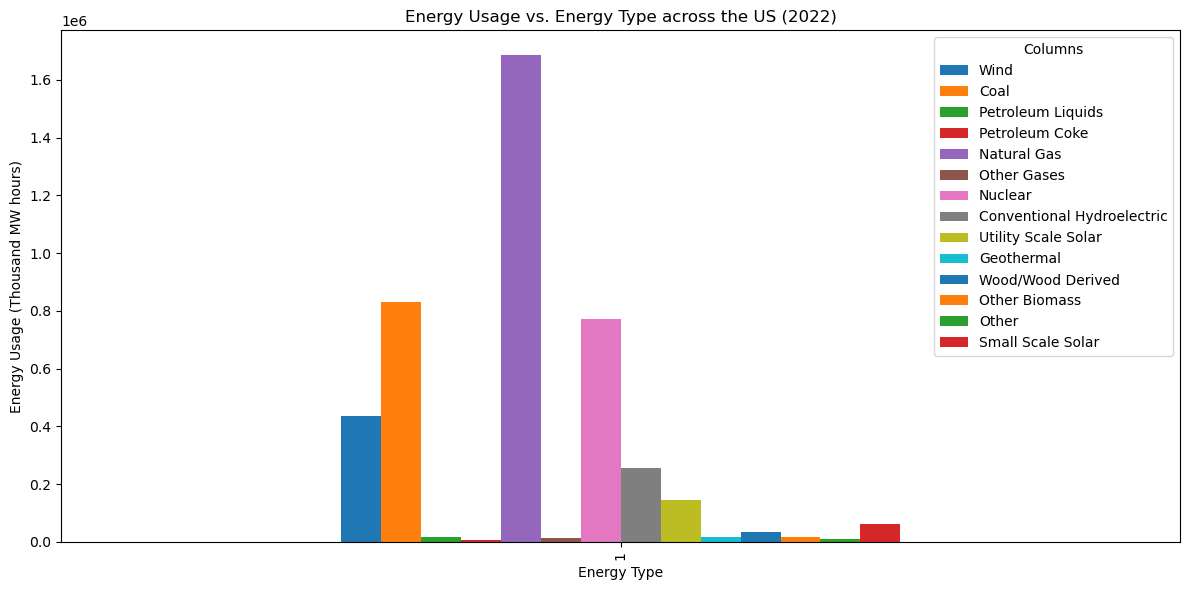

In [88]:
#Construct the Bar Graph
data_2022.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Energy Type')
plt.ylabel('Energy Usage (Thousand MW hours)')
plt.title('Energy Usage vs. Energy Type across the US (2022)')
plt.legend(title='Columns', bbox_to_anchor=(1, 1))
plt.tight_layout()


plt.savefig("Images/US_Energy_Usage.png")
plt.show()

In [9]:
#Moving on to part two, insert the csv that compares natural gas usage by state.

#Create a file path
State_generation = Path("Resources/data.csv")

#Read in the data
State = pd.read_csv(State_genertation)
State.head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF


In [17]:
#Extract just the 2022 data. This is so that the data is consistent with the other group members.
state_2022 = State[State['year'] ==2022]

state_2022.head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
30144,2022,1,SMD,USA-MD,EPG0,Natural Gas,VCS,Commercial Consumption,N3020MD2,Natural Gas Deliveries to Commercial Consumers...,12023.0,MMCF
30145,2022,1,SNY,NEW YORK,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NY2,Natural Gas Deliveries to Commercial Consumers...,47057.0,MMCF
30146,2022,1,SWV,USA-WV,EPG0,Natural Gas,VCS,Commercial Consumption,N3020WV2,Natural Gas Deliveries to Commercial Consumers...,3823.0,MMCF
30147,2022,1,SIN,USA-IN,EPG0,Natural Gas,VCS,Commercial Consumption,N3020IN2,Natural Gas Deliveries to Commercial Consumers...,18472.0,MMCF
30148,2022,1,SWI,USA-WI,EPG0,Natural Gas,VCS,Commercial Consumption,N3020WI2,Natural Gas Deliveries to Commercial Consumers...,19625.0,MMCF


In [19]:
#By examining the csv file it has become apparent that there is data in the "area-name" column that contains total U.S. info
#Remove it.
state_filtered = state_2022[state_2022['area-name'] != 'U.S.']

state_filtered.head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
30144,2022,1,SMD,USA-MD,EPG0,Natural Gas,VCS,Commercial Consumption,N3020MD2,Natural Gas Deliveries to Commercial Consumers...,12023.0,MMCF
30145,2022,1,SNY,NEW YORK,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NY2,Natural Gas Deliveries to Commercial Consumers...,47057.0,MMCF
30146,2022,1,SWV,USA-WV,EPG0,Natural Gas,VCS,Commercial Consumption,N3020WV2,Natural Gas Deliveries to Commercial Consumers...,3823.0,MMCF
30147,2022,1,SIN,USA-IN,EPG0,Natural Gas,VCS,Commercial Consumption,N3020IN2,Natural Gas Deliveries to Commercial Consumers...,18472.0,MMCF
30148,2022,1,SWI,USA-WI,EPG0,Natural Gas,VCS,Commercial Consumption,N3020WI2,Natural Gas Deliveries to Commercial Consumers...,19625.0,MMCF


In [35]:
#We need to clean our area-name values for ease of visualization
state_filtered_copy = state_filtered.copy()

replace_dict = {
    'USA-AK': 'ALASKA',
    'USA-AL': 'ALABAMA',
    'USA-AR': 'ARKANSAS',
    'USA-AZ': 'ARIZONA',
    'USA-CA': 'CALIFORNIA',
    'USA-CO': 'COLORADO',
    'USA-CT': 'CONNECTICUT',
    'USA-DE': 'DELAWARE',
    'USA-FL': 'FLORIDA',
    'USA-GA': 'GEORGIA',
    'USA-HI': 'HAWAII',
    'USA-IA': 'IOWA',
    'USA-ID': 'IDAHO',
    'USA-IL': 'ILLINOIS',
    'USA-IN': 'INDIANA',
    'USA-KS': 'KANSAS',
    'USA-KY': 'KENTUCKY',
    'USA-LA': 'LOUISIANA',
    'USA-MA': 'MASSACHUSETTS',
    'USA-MD': 'MARYLAND',
    'USA-ME': 'MAINE',
    'USA-MI': 'MICHIGAN',
    'USA-MN': 'MINNESOTA',
    'USA-MO': 'MISSOURI',
    'USA-MS': 'MISSISSIPPI',
    'USA-MT': 'MONTANA',
    'USA-NC': 'NORTH CAROLINA',
    'USA-ND': 'NORTH DAKOTA',
    'USA-NE': 'NEBRASKA',
    'USA-NH': 'NEW HAMPSHIRE',
    'USA-NJ': 'NEW JERSEY',
    'USA-NM': 'NEW MEXICO',
    'USA-NV': 'NEVADA',
    'USA-NY': 'NEW YORK',
    'USA-OH': 'OHIO',
    'USA-OK': 'OKLAHOMA',
    'USA-OR': 'OREGON',
    'USA-PA': 'PENNSYLVANIA',
    'USA-RI': 'RHODE ISLAND',
    'USA-SC': 'SOUTH CAROLINA',
    'USA-SD': 'SOUTH DAKOTA',
    'USA-TN': 'TENNESSEE',
    'USA-TX': 'TEXAS',
    'USA-UT': 'UTAH',
    'USA-VA': 'VIRGINIA',
    'USA-VT': 'VERMONT',
    'USA-WA': 'WASHINGTON',
    'USA-WI': 'WISCONSIN',
    'USA-WV': 'WEST VIRGINIA',
    'USA-WY': 'WYOMING'
}

state_filtered_copy['area-name'] = state_filtered_copy['area-name'].replace(replace_dict)

state_organized = state_filtered_copy

state_organized.head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
30144,2022,1,SMD,MARYLAND,EPG0,Natural Gas,VCS,Commercial Consumption,N3020MD2,Natural Gas Deliveries to Commercial Consumers...,12023.0,MMCF
30145,2022,1,SNY,NEW YORK,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NY2,Natural Gas Deliveries to Commercial Consumers...,47057.0,MMCF
30146,2022,1,SWV,WEST VIRGINIA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020WV2,Natural Gas Deliveries to Commercial Consumers...,3823.0,MMCF
30147,2022,1,SIN,INDIANA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020IN2,Natural Gas Deliveries to Commercial Consumers...,18472.0,MMCF
30148,2022,1,SWI,WISCONSIN,EPG0,Natural Gas,VCS,Commercial Consumption,N3020WI2,Natural Gas Deliveries to Commercial Consumers...,19625.0,MMCF


In [41]:
state_summed = state_organized.copy()

state_summed = state_summed.groupby('area-name').agg({'value': 'sum'}).reset_index()

state_summed

,area-name,value
0,ALABAMA,1452997.0
1,ALASKA,241058.0
2,ARIZONA,877097.0
3,ARKANSAS,758894.0
4,CALIFORNIA,4003659.0
5,COLORADO,846856.0
6,CONNECTICUT,582686.0
7,DELAWARE,169878.0
8,FLORIDA,3210590.0
9,GEORGIA,1546795.0


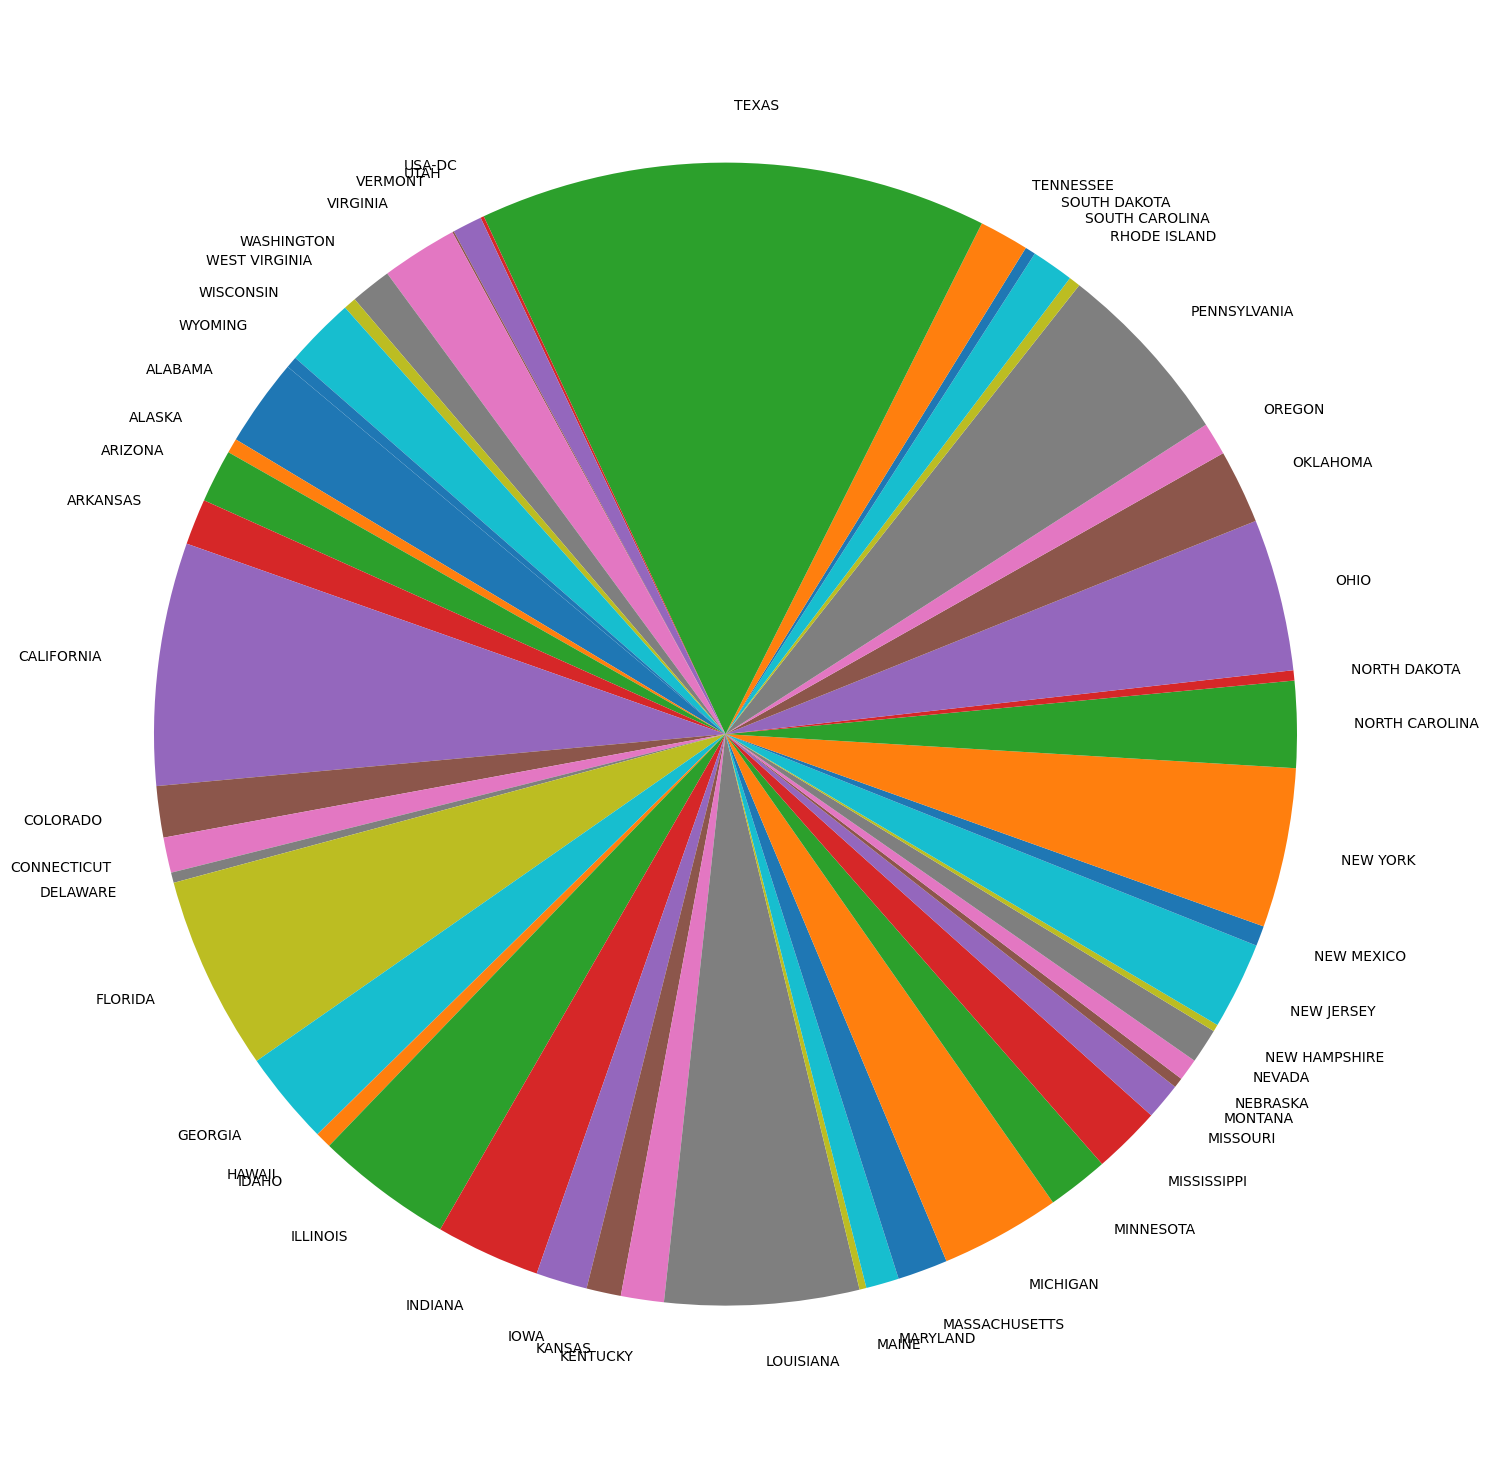

In [90]:
# Plotting the data as a pie chart
state_summed.set_index('area-name')['value'].plot(kind='pie', figsize=(15, 15), startangle=140)
plt.axis('equal')
plt.ylabel('')

plt.tight_layout()
plt.savefig("Images/Natural_Gas_Usage_By_State.png")
plt.show()